# Flights Data Exploration Challenge

In this challge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [8]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# Task - 1

1. Start by cleaning the data.

    Identify any null or missing data, and impute appropriate replacement values.
    
    Identify and eliminate any outliers in the DepDelay and ArrDelay columns.

In [9]:
# Your code to explore the data
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [10]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [11]:
df_flights[df_flights.isnull().any(axis=1)]['DepDelay'].describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [12]:
df_flights[df_flights.isnull().any(axis=1)][['DepDelay','DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


In [13]:
df_flights['DepDel15'] = df_flights['DepDel15'].fillna(0)

In [14]:
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
def dist_plot(df_cols, df = df_flights):
    """
    A function to get boxplot and distribution.
    By default df will have df_flights as a input.
    """
    min_val = df[df_cols].min()
    max_val = df[df_cols].max()
    mean_val = df[df_cols].mean()
    med_val = df[df_cols].median()
    mod_val = df[df_cols].mode()[0]

    print(df_cols,'\nMinimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df[df_cols], ax=ax_box)
    sns.histplot(df[df_cols], ax=ax_hist)
    ax_box.set(xlabel='')
    plt.show()
    

DepDelay 
Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00



c:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


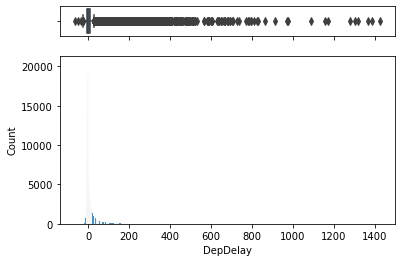

ArrDelay 
Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



c:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


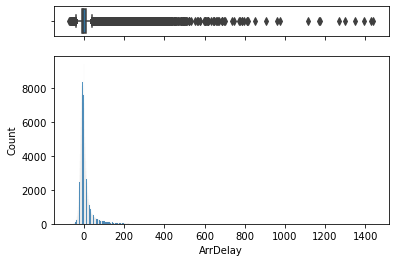

In [19]:
dist_plot("DepDelay")
dist_plot("ArrDelay")

In [56]:
def count_quant_elements(val1, val2, df_cols, df = df_flights, IQR = 0):
    V1 = df[df_cols].quantile(val1)
    V2 = df[df_cols].quantile(val2)
    perc_diff = V2 - V1
    val_op = ((df[df_cols] > (V1)) & (df[df_cols] < (V2))).sum()
    print(f'Values between {val1} and {val2} are: {val_op}, {val_op*100/len(df[df_cols])}%')
    print(f'Values above {val2} are: {(df[df_cols] > (V2)).sum()}, {(df[df_cols] > (V2)).sum()*100/len(df[df_cols])}%')
    print(f'Values below {val1} are: {(df[df_cols] < (V1)).sum()}, {(df[df_cols] < (V1)).sum()*100/len(df[df_cols])}%')
    
    df = df[df[df_cols] < V2]
    df = df[df[df_cols] > V1]
    
    dist_plot(df_cols, df = df)

Checking useful data for **DepDelay**

Values between 0.1 and 0.85 are: 198917, 73.14738545267339%
Values above 0.85 are: 40691, 14.96322718246672%
Values below 0.1 are: 20550, 7.556814003088917%
DepDelay 
Minimum:-6.00
Mean:0.92
Median:-1.00
Mode:-3.00
Maximum:21.00



c:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


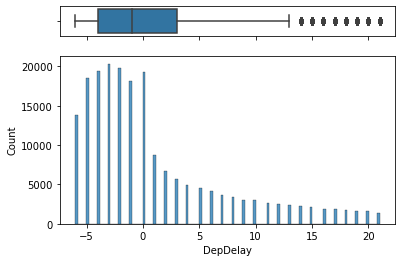

In [57]:
count_quant_elements(0.10, 0.85, 'DepDelay')

Values between 0.05 and 0.85 are: 209395, 77.0004412738104%
Values above 0.85 are: 40691, 14.96322718246672%
Values below 0.05 are: 13382, 4.9209384423034495%
DepDelay 
Minimum:-7.00
Mean:0.52
Median:-1.00
Mode:-3.00
Maximum:21.00



c:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


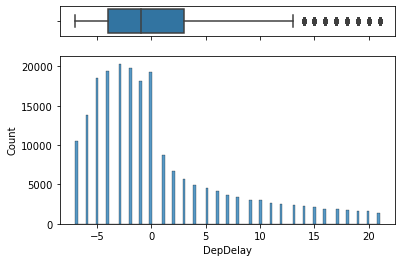

In [58]:
count_quant_elements(0.05, 0.85, 'DepDelay')

Values between 0.02 and 0.85 are: 221532, 81.46355813782452%
Values above 0.85 are: 40691, 14.96322718246672%
Values below 0.02 are: 4595, 1.6897109656541884%
DepDelay 
Minimum:-9.00
Mean:0.03
Median:-2.00
Mode:-3.00
Maximum:21.00



c:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


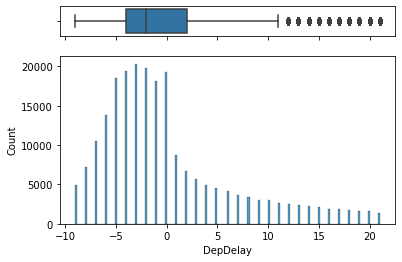

In [59]:
count_quant_elements(0.02, 0.85, 'DepDelay')

Values between 0.05 and 0.85 are: 209395, 77.0004412738104%
Values above 0.85 are: 40691, 14.96322718246672%
Values below 0.05 are: 13382, 4.9209384423034495%
DepDelay 
Minimum:-7.00
Mean:0.52
Median:-1.00
Mode:-3.00
Maximum:21.00



c:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


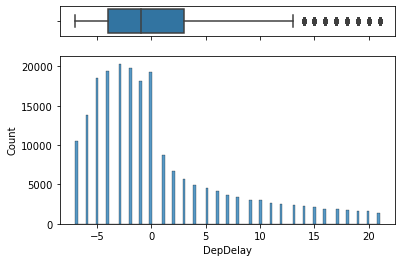

In [62]:
count_quant_elements(0.05, 0.85, 'DepDelay')

Checking for useful data for **ArrDelay**

Values between 0.05 and 0.85 are: 215755, 79.33919246892697%
Values above 0.85 are: 40365, 14.84334779730823%
Values below 0.05 are: 12408, 4.562771199529308%
ArrDelay 
Minimum:-22.00
Mean:-3.49
Median:-5.00
Mode:0.00
Maximum:22.00



c:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


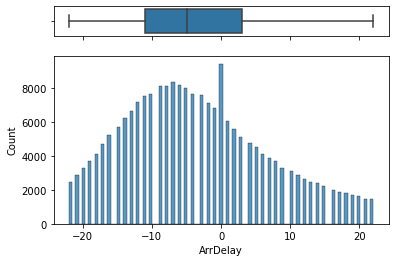

In [63]:
count_quant_elements(0.05, 0.85, 'ArrDelay')

Values between 0.05 and 0.9 are: 223980, 82.3637567110392%
Values above 0.9 are: 26748, 9.835993233801574%
Values below 0.05 are: 13382, 4.9209384423034495%
DepDelay 
Minimum:-7.00
Mean:2.32
Median:-1.00
Mode:-3.00
Maximum:36.00



c:\program files\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


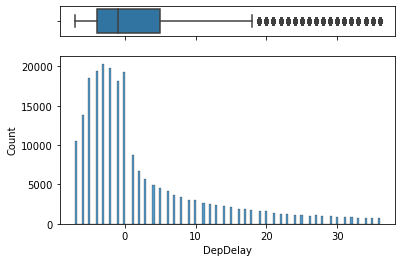

In [64]:
count_quant_elements(0.05, 0.90, 'DepDelay')

**Most of the Outliers are above 75th percentile and comparatively less outliers below 25 percentile**

**Hence choosing data between 5th to 90th percentile from above graphs** 

# Task 2

2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*


Filtering the required data

Remoing outliers from ArrDelay

In [66]:
V1 = df_flights['ArrDelay'].quantile(0.05)
V2 = df_flights['ArrDelay'].quantile(0.90)
df_flights = df_flights[df_flights['ArrDelay'] < V2]
df_flights = df_flights[df_flights['ArrDelay'] > V1]

Removing outliers from DepDelay

In [67]:
V1 = df_flights['DepDelay'].quantile(0.05)
V2 = df_flights['DepDelay'].quantile(0.90)
df_flights = df_flights[df_flights['DepDelay'] < V2]
df_flights = df_flights[df_flights['DepDelay'] > V1]

In [68]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190201 entries, 0 to 271938
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               190201 non-null  int64  
 1   Month              190201 non-null  int64  
 2   DayofMonth         190201 non-null  int64  
 3   DayOfWeek          190201 non-null  int64  
 4   Carrier            190201 non-null  object 
 5   OriginAirportID    190201 non-null  int64  
 6   OriginAirportName  190201 non-null  object 
 7   OriginCity         190201 non-null  object 
 8   OriginState        190201 non-null  object 
 9   DestAirportID      190201 non-null  int64  
 10  DestAirportName    190201 non-null  object 
 11  DestCity           190201 non-null  object 
 12  DestState          190201 non-null  object 
 13  CRSDepTime         190201 non-null  int64  
 14  DepDelay           190201 non-null  int64  
 15  DepDel15           190201 non-null  float64
 16  CR

In [69]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,190201.0,190201.000000,190201.000000,190201.000000,190201.000000,190201.000000,190201.000000,190201.000000,190201.000000,190201.000000,190201.000000,190201.000000,190201.000000
mean,2013.0,7.003743,15.807798,3.901904,12746.827535,12728.524251,1283.033354,0.070378,0.029485,1466.231035,-3.316670,0.078527,0.014879
std,0.0,1.996984,8.837547,1.993815,1512.592383,1515.046946,467.383763,5.656859,0.169161,484.319766,10.610747,0.269001,0.121069
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-7.000000,0.000000,1.000000,-22.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,855.000000,-4.000000,0.000000,1058.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1240.000000,-1.000000,0.000000,1449.000000,-5.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1655.000000,2.000000,0.000000,1846.000000,3.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,17.000000,1.000000,2359.000000,37.000000,1.000000,1.000000


**1. What are the average (mean) departure and arrival delays?**

In [76]:
df_flights[["ArrDelay", "DepDelay"]].mean()

ArrDelay   -3.316670
DepDelay    0.070378
dtype: float64

**2. How do the carriers compare in terms of arrival delay performance?**

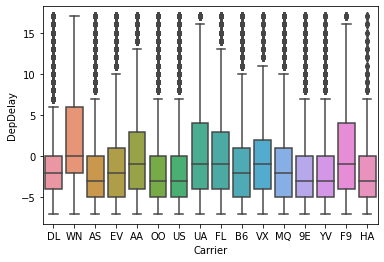

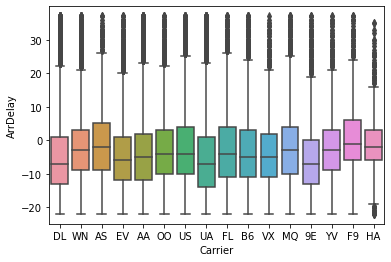

In [80]:
sns.boxplot(x="Carrier", y="DepDelay", data=df_flights)
plt.show()
sns.boxplot(x="Carrier", y="ArrDelay", data=df_flights)
plt.show()

**3. Are some days of the week more prone to arrival days than others?**

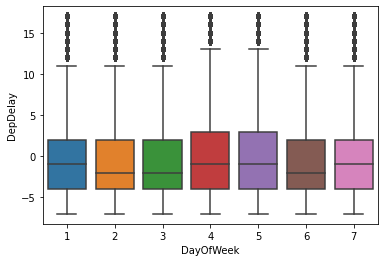

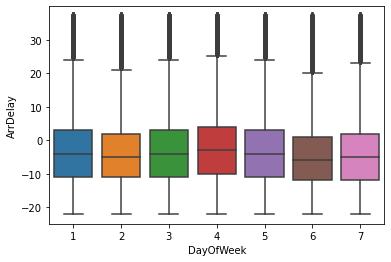

In [81]:
sns.boxplot(x="DayOfWeek", y="DepDelay", data=df_flights)
plt.show()
sns.boxplot(x="DayOfWeek", y="ArrDelay", data=df_flights)
plt.show()

**4. Which departure airport has the highest average departure delay?**

In [85]:
df_flights_airport = df_flights.groupby(df_flights['OriginAirportName'])
airport_mean_delay = df_flights_airport['DepDelay'].mean()
airport_mean_delay

OriginAirportName
Albuquerque International Sunport                       0.434351
Austin - Bergstrom International                        0.360268
Baltimore/Washington International Thurgood Marshall    1.635194
Bob Hope                                                0.120690
Bradley International                                  -0.094714
                                                          ...   
Theodore Francis Green State                           -0.462758
Tucson International                                   -1.162534
Washington Dulles International                        -0.117258
Will Rogers World                                      -0.485743
William P Hobby                                         2.163619
Name: DepDelay, Length: 70, dtype: float64

In [89]:
airport_mean_delay = airport_mean_delay.sort_values(ascending=False)
airport_mean_delay

OriginAirportName
Chicago Midway International                            2.869887
Dallas Love Field                                       2.727212
William P Hobby                                         2.163619
Metropolitan Oakland International                      1.709449
Baltimore/Washington International Thurgood Marshall    1.635194
                                                          ...   
Richmond International                                 -1.379261
Kahului Airport                                        -1.528536
Memphis International                                  -1.739166
Cincinnati/Northern Kentucky International             -1.793567
Long Beach Airport                                     -2.087931
Name: DepDelay, Length: 70, dtype: float64

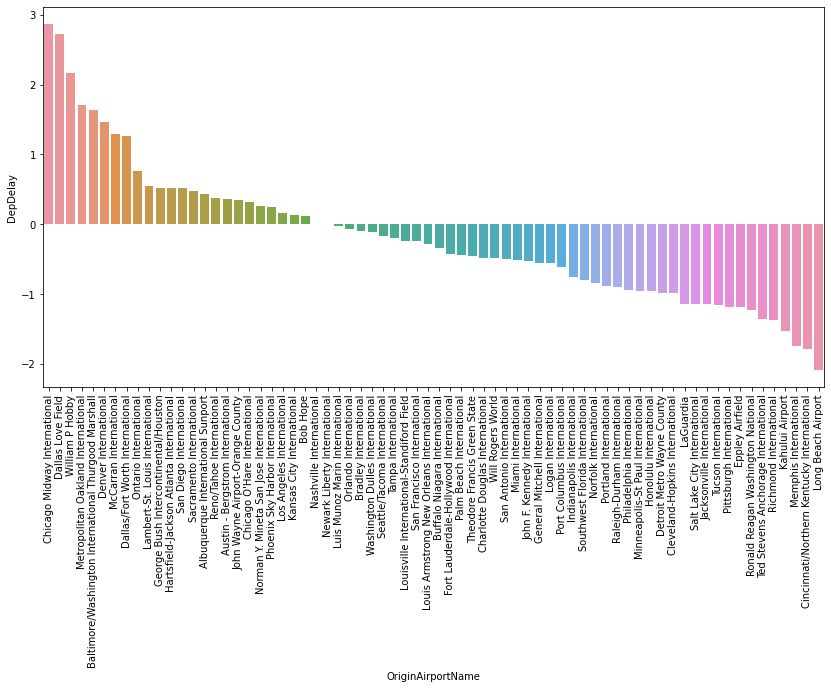

In [101]:
airport_mean_delay = pd.DataFrame(airport_mean_delay)
fig, ax = plt.subplots(figsize=(14, 7))
sns.barplot(x = airport_mean_delay.index , y = 'DepDelay', data =  airport_mean_delay, ax = ax)
ax.set_xticklabels(airport_mean_delay.index, rotation=90)
plt.show()

**5. Do late departures tend to result in longer arrival delays than on-time departures?**

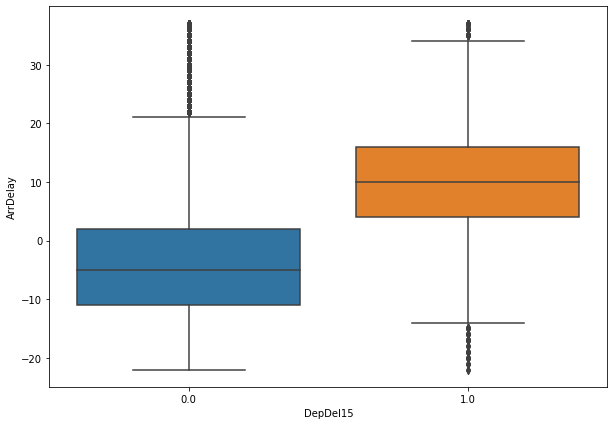

In [104]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(y = 'ArrDelay' , x = 'DepDel15', data =  df_flights, ax = ax)
#ax.set_xticklabels(airport_mean_delay.index, rotation=90)
plt.show()